Import libraries

In [1]:
import lecilab_behavior_analysis.utils as utils
import lecilab_behavior_analysis.df_transforms as dft
import lecilab_behavior_analysis.plots as plots
from pathlib import Path
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns

%load_ext autoreload
%autoreload 2

Retrieve data from the server

In [ ]:
# see the available projects
tv_projects = utils.get_server_projects()
animals = utils.get_animals_in_project(tv_projects[1])
animals_to_remove = ['test', 'test2']
animals = [animal for animal in animals if animal not in animals_to_remove]
print(animals)

['COT_test_data', 'visual_and_COT_data']


In [5]:
# retrieve the data for the remaining animals
for mouse in animals:
    local_path = Path(utils.get_outpath()) / Path(tv_projects[1]) / Path("sessions") / Path(mouse)
    # create the directory if it doesn't exist
    local_path.mkdir(parents=True, exist_ok=True)
    # download the session data
    utils.rsync_session_data(
        project_name=tv_projects[1],
        animal=mouse,
        local_path=str(local_path),
        credentials=utils.get_idibaps_cluster_credentials(),
    )

receiving incremental file list
ACV001.csv

sent 80,876 bytes  received 3,557,623 bytes  269,518.44 bytes/sec
total size is 153,494,618  speedup is 42.19
receiving incremental file list
ACV002.csv

sent 80,771 bytes  received 25,511,770 bytes  2,225,438.35 bytes/sec
total size is 149,676,680  speedup is 5.85
receiving incremental file list
ACV003.csv

sent 78,769 bytes  received 1,501,125 bytes  150,466.10 bytes/sec
total size is 134,948,216  speedup is 85.42
receiving incremental file list
ACV004.csv

sent 66,050 bytes  received 1,426,594 bytes  157,120.42 bytes/sec
total size is 96,939,679  speedup is 64.94
receiving incremental file list
ACV005.csv

sent 65,213 bytes  received 2,064,524 bytes  327,651.85 bytes/sec
total size is 98,458,122  speedup is 46.23
receiving incremental file list
ACV006.csv

sent 69,389 bytes  received 2,499,707 bytes  223,399.65 bytes/sec
total size is 112,574,595  speedup is 43.82
receiving incremental file list
ACV007.csv

sent 65,938 bytes  received 2,01

Read the data

In [6]:
df_list = []
for mouse in animals:
    local_path = Path(utils.get_outpath()) / Path(tv_projects[1]) / Path("sessions") / Path(mouse)
    df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")
    df_list.append(df)
    print(f"Loaded data for {mouse}.")
# concatenate the dataframes
df = pd.concat(df_list, ignore_index=True)

/tmp/ipykernel_73412/287582578.py:4: DtypeWarning: Columns (13,14,17,18,27,28,29,30,38,39,40,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")


Loaded data for ACV001.


/tmp/ipykernel_73412/287582578.py:4: DtypeWarning: Columns (13,14,27,28,29,30,38,39,40) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")


Loaded data for ACV002.


/tmp/ipykernel_73412/287582578.py:4: DtypeWarning: Columns (13,14,17,18,27,28,29,30,38,39,40,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")


Loaded data for ACV003.


/tmp/ipykernel_73412/287582578.py:4: DtypeWarning: Columns (13,14,27,28,29,30,38,39,40,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")


Loaded data for ACV004.


/tmp/ipykernel_73412/287582578.py:4: DtypeWarning: Columns (13,14,27,28,29,30,38,39,40,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")


Loaded data for ACV005.


/tmp/ipykernel_73412/287582578.py:4: DtypeWarning: Columns (13,14,17,18,27,28,29,30,38,39,40,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")


Loaded data for ACV006.


/tmp/ipykernel_73412/287582578.py:4: DtypeWarning: Columns (13,14,17,18,27,28,29,30,38,39,40) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")


Loaded data for ACV007.


/tmp/ipykernel_73412/287582578.py:4: DtypeWarning: Columns (13,14,17,18,27,28,29,30,38,39,40,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")


Loaded data for ACV008.


/tmp/ipykernel_73412/287582578.py:4: DtypeWarning: Columns (13,14,17,18,27,28,29,30,38,39,40) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")


Loaded data for ACV009.


/tmp/ipykernel_73412/287582578.py:4: DtypeWarning: Columns (13,14,17,18,27,28,29,30,38,39,40,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")


Loaded data for ACV010.


Occupancy of the box and mouse entries analysis

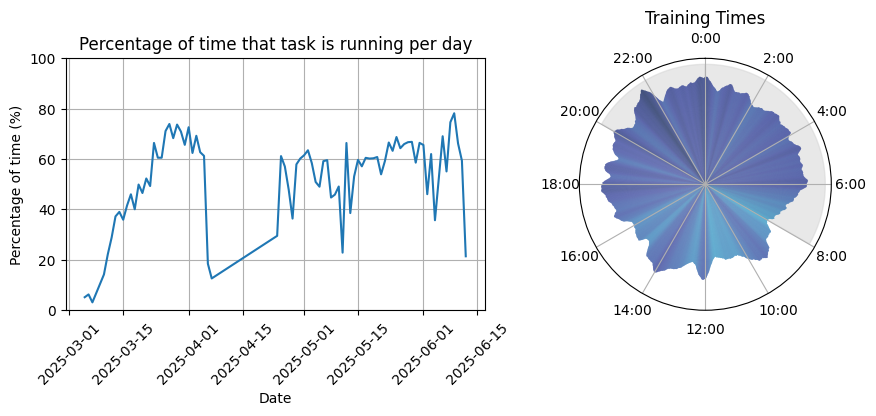

In [9]:
# Plot the percentage of time that the task is running per day and the heatmap of the occupancy during the day
occupancy_df = dft.get_start_and_end_of_sessions_df(df)
daily_percentages = dft.get_daily_occupancy_percentages(occupancy_df)
occupancy_heatmap = dft.get_occupancy_heatmap(occupancy_df, window_size=30)
fig, axs = plt.subplots(1, 2, figsize=(9, 4), gridspec_kw={'width_ratios': [3, 2]})
# plot the percentage of occupancy per day
plots.plot_percentage_of_occupancy_per_day(daily_percentages, ax=axs[0])
# plot the heatmap of occupancy
# transform the second plot to a polar one like this subplot_kw={'projection': 'polar'}
fig.delaxes(axs[1])  # Remove the default second subplot
axs[1] = fig.add_subplot(1, 2, 2, projection='polar')  # Add a polar subplot
plots.plot_training_times_clock_heatmap(occupancy_heatmap, ax=axs[1])
plt.tight_layout()
plt.show()


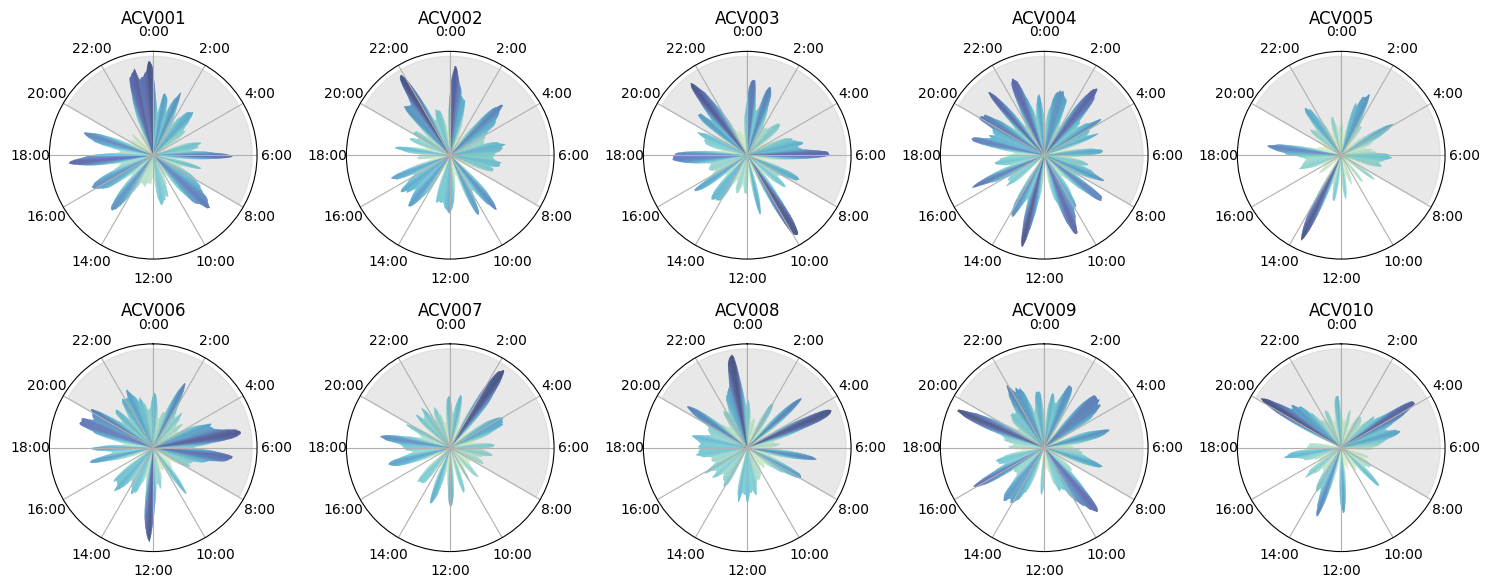

In [10]:
total_subjects = occupancy_df['subject'].nunique()
ncols = 5
nrows = int(np.ceil(total_subjects / ncols))
fig, axs = plt.subplots(nrows, ncols, figsize=(15, 3 * nrows), subplot_kw={'projection': 'polar'})
for subject, ax in zip(occupancy_df['subject'].unique(), axs.ravel()):
    df_sub = occupancy_df[occupancy_df['subject'] == subject]
    occupancy_heatmap_sub = dft.get_occupancy_heatmap(df_sub)
    plots.plot_training_times_clock_heatmap(occupancy_heatmap_sub, ax=ax)
    ax.set_title(subject, pad=20)
plt.tight_layout()
plt.show()

In [12]:
# create a similar plot with the mean and std for each mouse
occupancy_matrix_dict = {}
for mouse in occupancy_df['subject'].unique():
    mouse_df = occupancy_df[occupancy_df['subject'] == mouse]
    occupancy_matrix_dict[mouse] = dft.get_occupancy_matrix(mouse_df, window_size=30)


/home/hmv/Github/lecilab-behavior-analysis/lecilab_behavior_analysis/df_transforms.py:341: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  occupancy_matrix.fillna(0, inplace=True)


Processed 100 rows out of 216
Processed 200 rows out of 216


/home/hmv/Github/lecilab-behavior-analysis/lecilab_behavior_analysis/df_transforms.py:341: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  occupancy_matrix.fillna(0, inplace=True)


Processed 100 rows out of 219
Processed 200 rows out of 219


/home/hmv/Github/lecilab-behavior-analysis/lecilab_behavior_analysis/df_transforms.py:341: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  occupancy_matrix.fillna(0, inplace=True)


KeyboardInterrupt: 

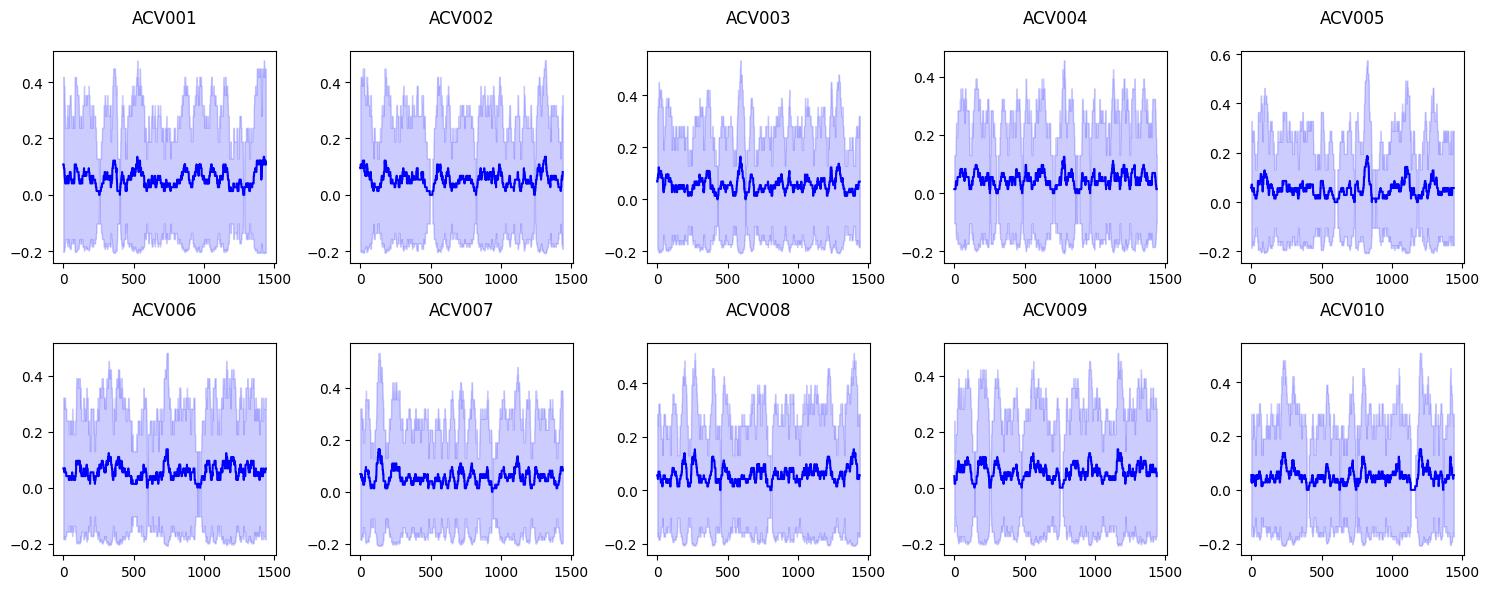

In [ ]:
# calculate the mean and std for each mouse
fig, axs = plt.subplots(nrows, ncols, figsize=(15, 3 * nrows))
for subject, ax in zip(occupancy_matrix_dict.keys(), axs.ravel()):
    mymat = occupancy_matrix_dict[subject]
    mean_mymat = np.nanmean(mymat, axis=0)
    std_mymat = np.nanstd(mymat, axis=0)
    # plot a shaded area for the std
    ax.plot(mean_mymat, label='Mean occupancy', color='blue')
    ax.fill_between(
        np.arange(len(mean_mymat)),
        mean_mymat - std_mymat,
        mean_mymat + std_mymat,
        color='blue',
        alpha=0.2,
        label='Std occupancy'
    )
    ax.set_title(subject, pad=20)

plt.tight_layout()
plt.show()


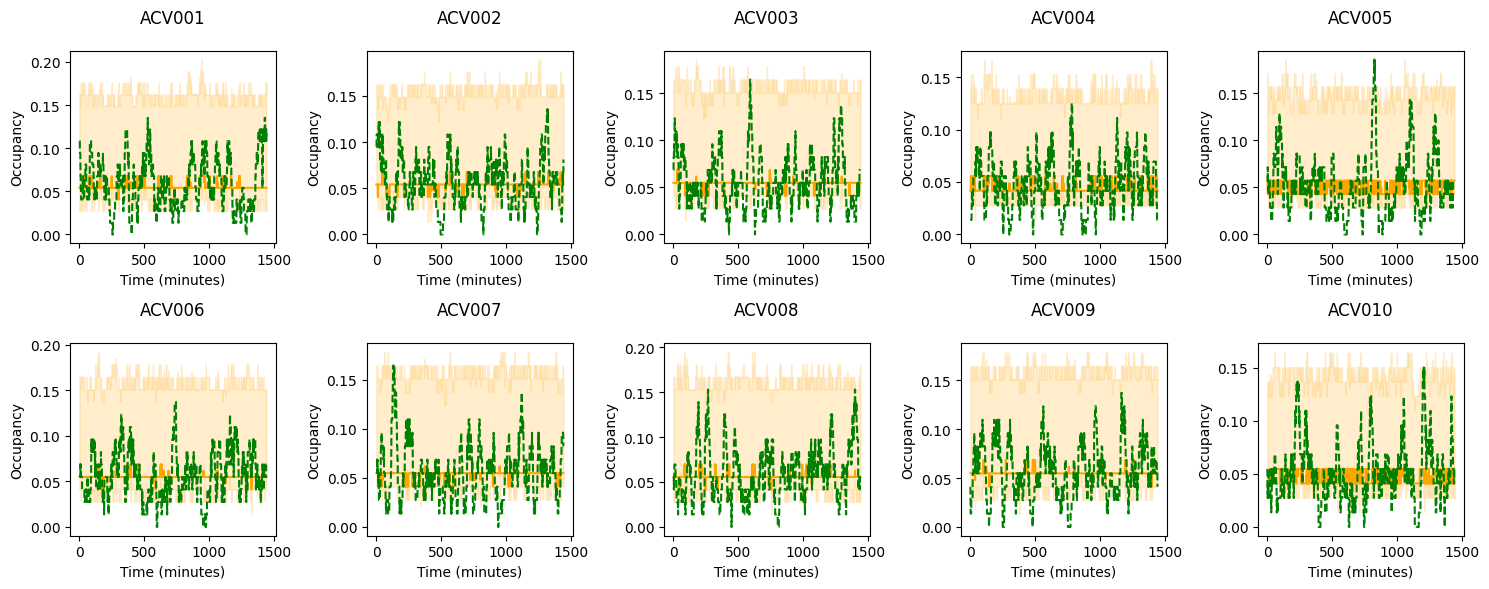

In [ ]:
# For each block, run a randomized shift for each row of the matrix and calculate confidence intervals
n_times = 100

fig, axs = plt.subplots(nrows, ncols, figsize=(15, 3 * nrows))
for subject, ax in zip(occupancy_matrix_dict.keys(), axs.ravel()):
    mymat = occupancy_matrix_dict[subject]
    shifted_means = np.zeros((n_times, mymat.shape[1]))
    for i in range(n_times):
        shifted_mymat = np.zeros_like(mymat)
        for row_idx in range(mymat.shape[0]):  # Access rows by index
            # Randomly shift the row
            shift = np.random.randint(0, mymat.shape[1])
            shifted_mymat[row_idx] = np.roll(mymat.iloc[row_idx], shift)
        # Calculate the mean of the shifted matrix
        shifted_means[i] = np.nanmean(shifted_mymat, axis=0)
    # Calculate the mean and cis of the shifted means
    mean_shifted_mymat = np.nanmean(shifted_means, axis=0)
    top_ci_shifted_mymat = np.nanpercentile(shifted_means, 95, axis=0)
    bottom_ci_shifted_mymat = np.nanpercentile(shifted_means, 5, axis=0)
    # Plot the mean and std of the shifted matrix
    ax.plot(mean_shifted_mymat, label='Mean shifted occupancy', color='orange')
    ax.fill_between(
        np.arange(len(mean_shifted_mymat)),
        mean_shifted_mymat - bottom_ci_shifted_mymat,
        mean_shifted_mymat + top_ci_shifted_mymat,
        color='orange',
        alpha=0.2,
        label='Std shifted occupancy'
    )
    # plot the original mean of the occupancy matrix
    mean_mymat = np.nanmean(mymat, axis=0)
    ax.plot(mean_mymat, label='Original Mean occupancy', color='green', linestyle='--')
    ax.set_title(f"{subject}", pad=20)
    ax.set_xlabel('Time (minutes)')
    ax.set_ylabel('Occupancy')
# ax.legend()
plt.tight_layout()
plt.show()


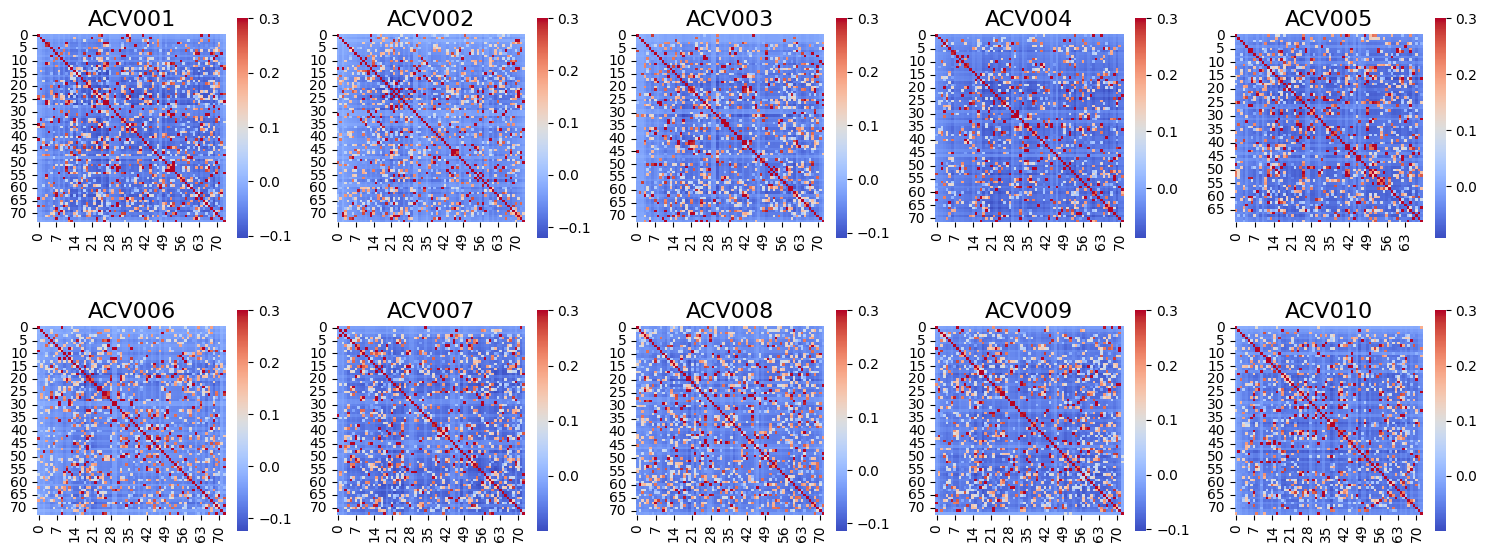

In [ ]:
# Plot a correlation matrix of the occupancy matrix
fig, axs = plt.subplots(nrows, ncols, figsize=(15, 3 * nrows))
for subject, ax in zip(occupancy_matrix_dict.keys(), axs.ravel()):
    mymat = occupancy_matrix_dict[subject]
    corr_matrix = np.corrcoef(mymat.transpose(), rowvar=False)
    # cap the color range to avoid extreme values
    sns.heatmap(corr_matrix, ax=ax, cmap='coolwarm', annot=False, square=True, cbar_kws={"shrink": .8}, vmax=.3)
    ax.set_title(subject, fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
# the above matrices are very noisy, compute the average correlation for each session lag (averaging the matrix r(k, k’)
# along the diagonal so that you end up with an average correlation r(k-k’)
# which is only a function of the difference between the session indexes).
def average_correlation(matrix):
    n = matrix.shape[0]
    avg_corr = np.zeros(n)
    for k in range(n-1):
        # Get the diagonal elements for the current lag
        diag_elements = [matrix[i, i + 1 + k] for i in range(n - k - 1)]
        avg_corr[k] = np.nanmean(diag_elements)
    return avg_corr

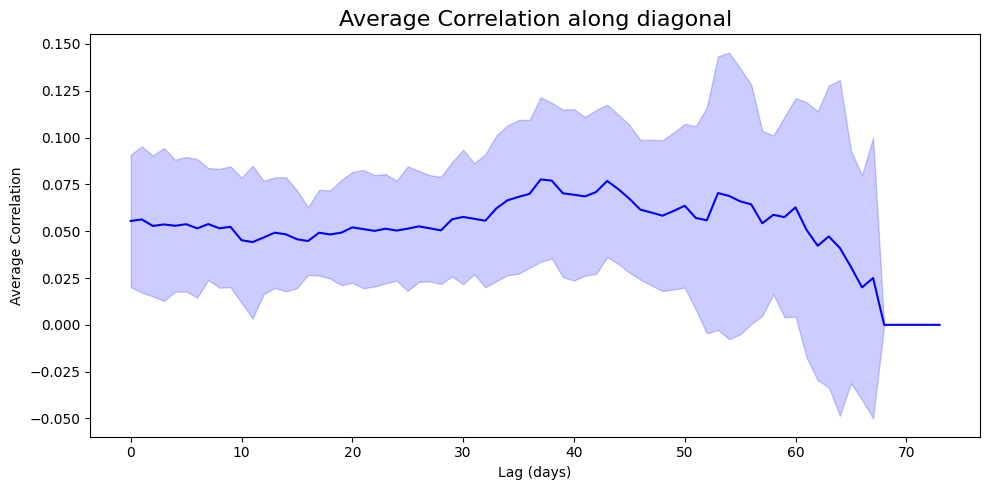

In [ ]:
# compute the average correlation for each mouse in form of a matrix
max_length = max([len(matrix) for matrix in occupancy_matrix_dict.values()])
avg_corr_matrix = np.zeros((len(occupancy_matrix_dict), max_length))
# fill the matrix with NaN where there is no data
avg_corr_matrix.fill(np.nan)
for i, (mouse, matrix) in enumerate(occupancy_matrix_dict.items()):
    # Ensure the matrix is a numpy array
    matrix = np.array(matrix)
    avg_corr_matrix[i, :len(matrix)] = average_correlation(matrix)
# plot the average correlation mean and std
avg_corr_mean = np.nanmean(avg_corr_matrix, axis=0)
avg_corr_std = np.nanstd(avg_corr_matrix, axis=0)
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(avg_corr_mean, label='Average Correlation', color='blue')
ax.fill_between(
    np.arange(len(avg_corr_mean)),
    avg_corr_mean - avg_corr_std,
    avg_corr_mean + avg_corr_std,
    color='blue',
    alpha=0.2,
    label='Std of Average Correlation'
)
ax.set_title('Average Correlation along diagonal', fontsize=16)
ax.set_ylabel('Average Correlation')
ax.set_xlabel('Lag (days)')
plt.tight_layout()
plt.show()


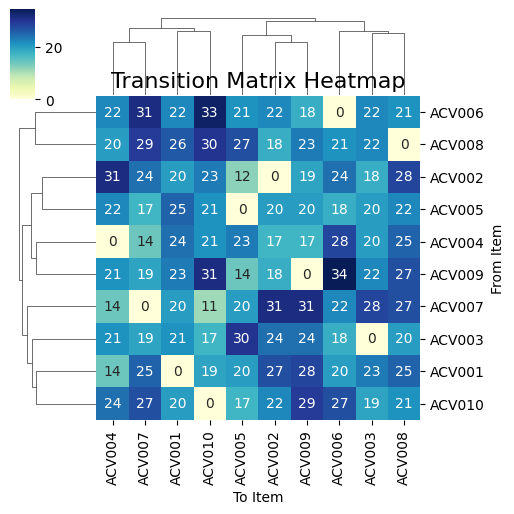

In [ ]:
## Analyse the entry orders of the animals
# Sort the dataframe by start_time
sorted_occupancy_df = occupancy_df.sort_values(by='start_time')
# Extract the ordered list of subject names
ordered_subjects = sorted_occupancy_df['subject'].tolist()
# Create the transition matrix
transition_matrix = dft.create_transition_matrix(ordered_subjects)
# Plot the transition matrix
# fig, ax = plt.subplots(figsize=(8, 6))
plots.plot_transition_matrix(transition_matrix)
plt.show()

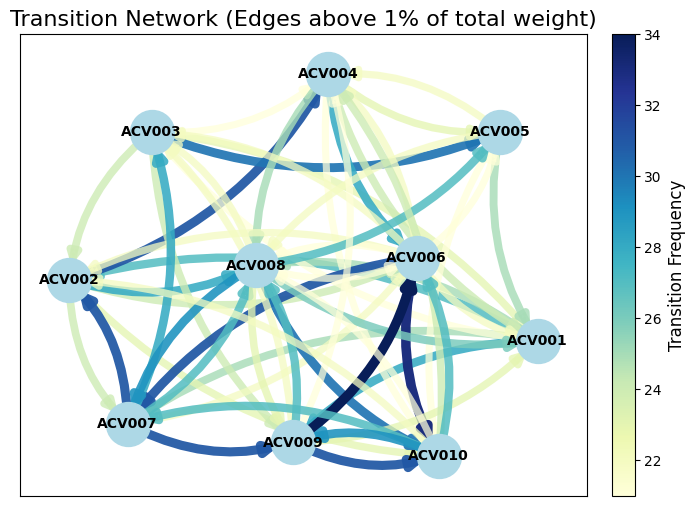

In [ ]:
# Plot a network graph
fig = plots.plot_transition_network_with_curved_edges(transition_matrix, threshold=1, figsize=(8, 6))
plt.show()